# Coursera Capstone Project
## The Battle of Neighborhoods (Week 1)

## Coursera Capstone - REPORT CONTENT

1. Introduction Section : Discussion of the business problem and the interested audience in this project.
2. Data Section : Description of the data that will be used to solve the problem and the sources.
Methodology section : Discussion and description of exploratory data analysis carried out, any inferential statistical testing performed, and if any machine learnings were used establishing the strategy and purposes.
Results section : Discussion of the results.
Discussion section : Elaboration and discussion on any observations noted and any recommendations suggested based on the results.
Conclusion section : Report Conclusion.

In [ ]:
import numpy as np # library to handle data in a vectorized manner
import time
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe


In [2]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [3]:
from geopy.geocoders import Nominatim 
!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


## EXECUTION METHODOLOGY - Mapping Data

Gurgaon, Haryana Map - Current residence and venues in neighborhood

for comparison to future Manhattan renting place

In [4]:
address = 'Gurgaon, Haryana'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Gurgaon home are {}, {}.'.format(latitude, longitude))

C:\Users\Zid1295\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  


The geograpical coordinate of Gurgaon home are 28.42826235, 77.00270014657752.


Dial FourSquare to find venues around current residence in Visakhapatnam

In [38]:
neighborhood_latitude = latitude
neighborhood_longitude = longitude
neighbourhood_name = address

In [13]:
CLIENT_ID = 'SHDYIWCOFJACIXFQEROWPJIVR53J2CLDKZKZ5R5FB1G0EJ10' # your Foursquare ID
CLIENT_SECRET = 'XEW4NI4NHBMC5U5YW3A2ZDE4A2E21COL0NZVOMQF0I5BKZ45' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: UQ5PDBTEPFUVJX3TSKTMBJ3OMCTJ0RCFV5CAPHG0IFFJIJ2Y
CLIENT_SECRET:R3TM3IGZ3I5IVL0BNB1BOX5FSASAAZ0RPYKZMHWWYTMV434M


In [50]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 5000 # define radius

In [51]:
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=UQ5PDBTEPFUVJX3TSKTMBJ3OMCTJ0RCFV5CAPHG0IFFJIJ2Y&client_secret=R3TM3IGZ3I5IVL0BNB1BOX5FSASAAZ0RPYKZMHWWYTMV434M&v=20180604&ll=28.42826235,77.00270014657752&radius=5000&limit=100'

In [52]:
results = requests.get(url).json()

function that extracts the category of the venue - borrow from the Foursquare lab

In [53]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [54]:
venues = results['response']['groups'][0]['items']
SGnearby_venues = json_normalize(venues) # flatten JSON
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
SGnearby_venues =SGnearby_venues.loc[:, filtered_columns]
# filter the category for each row
SGnearby_venues['venue.categories'] = SGnearby_venues.apply(get_category_type, axis=1)
# clean columns
SGnearby_venues.columns = [col.split(".")[-1] for col in SGnearby_venues.columns]

SGnearby_venues.shape

(38, 4)

In [55]:
SGnearby_venues.head(100)

,name,categories,lat,lng
0,Decathlon Gurgaon,Sporting Goods Shop,28.427433,77.036258
1,Brewer Street,Brewery,28.424499,77.039134
2,Bikanervala,Indian Restaurant,28.419831,77.040156
3,Sagar Ratna,Indian Restaurant,28.421042,77.038509
4,Open Tap,Brewery,28.405130,77.044332
5,Good Earth City Centre,Shopping Mall,28.421766,77.053183
6,Starbucks,Coffee Shop,28.406085,77.044741
7,Hyatt Regency Gurgaon,Hotel,28.392552,76.976269
8,Vapour Bar Exchange,Brewery,28.406734,77.041820
9,Haldiram,Indian Restaurant,28.401791,76.989000


Map of Gajuwaka residence place with venues in Neighborhood - for reference

In [57]:
# create map of Gurgaon using latitude and longitude values
map_sg = folium.Map(location=[latitude, longitude], zoom_start=12)

# add a red circle marker to represent the selected neighborhood
folium.features.CircleMarker(
    [latitude, longitude],
    radius=200,
    color='red',
    popup= neighbourhood_name,
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.1
).add_to(map_sg)


# add markers to map
for lat, lng, name, categories in zip(SGnearby_venues['lat'], SGnearby_venues['lng'], SGnearby_venues['name'], SGnearby_venues['categories']):
    label = '{}, {}'.format(name, categories)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3199cc',
        fill_opacity=0.3).add_to(map_sg)  

map_sg

In [58]:
import folium # map rendering library
from folium import plugins

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans

MANHATTAN NEIGHBORHOODS - DATA AND MAPPING
Cluster neighborhood data was produced with Foursquare during course lab work. A csv file was produced containing the neighborhoods around the 40 Boroughs. Now, the csv file is just read for convenience and consolidation of report

In [376]:
from bs4 import BeautifulSoup
import requests

In [377]:
#Fetching the data from the given website
source = requests.get('https://manhattanny.areaconnect.com/zip2.htm?city=Manhattan&search=zip').text

In [378]:
soup = BeautifulSoup(source, 'lxml')
print(soup.prettify())

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">
<html>
 <head>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="Manhattan Yellow Pages ...find local info, white pages, demographics and more using Areaconnect Manhattan" name="description"/>
  <meta content="Manhattan yellow pages, Manhattan YellowPages, Manhattan business yellow pages, Manhattan white pages, Manhattan people search" name="keywords"/>
  <meta content="noarchive" name="robots"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <title>
   Manhattan  Zip Codes, Area Code, County and more
  </title>
  <script type="text/javascript">
   var _gaq = _gaq || [];
            _gaq.push(['_setAccount', 'UA-2522429-7']);
			_gaq.push(['_setDomainName', '.areaconnect.com']);
			_gaq.push(['_trackPageview']);
  </script>
  <link href="http://manhattanny.areaconnect.com/zip2.htm?city=Manhattan&amp;search=zip" rel="canonical"/>
  <script language="JavaScript">
   fu

In [379]:
#Fetching postal code along with coordinates
data = list()
for div in soup.find_all('div', attrs={'class': 'row'}):
     
        if 'header' not in div.attrs['class']:
            postalcode = div.find_all('div')[0].text.rstrip()
            lat = div.find_all('div')[5].text.rstrip()
            long = div.find_all('div')[6].text.rstrip()

            data.append([postalcode, lat, long])    

In [380]:
data[:5]

[['10001', '40.752', '-73.995'],
 ['10002', '40.716', '-73.988'],
 ['10003', '40.732', '-73.990'],
 ['10005', '40.708', '-74.012'],
 ['10006', '40.711', '-74.013']]

In [381]:
cols = ['postal_cd', 'lat', 'long']

In [382]:
lat_long_data = pd.DataFrame(data, columns = cols)
print(lat_long_data.shape)

(93, 3)


In [383]:
lat_long_data.describe()

,postal_cd,lat,long
count,93,93,93
unique,93,59,57
top,10024,40.759,-73.977
freq,1,5,5


In [384]:
lat_long_data

,postal_cd,lat,long
0,10001,40.752,-73.995
1,10002,40.716,-73.988
2,10003,40.732,-73.990
3,10005,40.708,-74.012
4,10006,40.711,-74.013
5,10007,40.713,-74.010
6,10008,40.712,-74.007
7,10009,40.725,-73.980
8,10010,40.742,-73.988
9,10012,40.724,-73.996


In [385]:
# function that extracts the category of the venue
def get_address(row):
 
    location = geolocator.geocode("{},{}".format(row['lat'],row['long']), timeout=10)
    
    try:
        return location[0].split(',')[-7].strip() 
    
    except:
        return location[0].split(',')[-6].strip()

In [386]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my-application")
lat_long_data['Neighbourhood'] = lat_long_data.apply(get_address, axis=1)

In [387]:
lat_long_data.head()

,postal_cd,lat,long,Neighbourhood
0,10001,40.752,-73.995,Chelsea
1,10002,40.716,-73.988,Lower East Side
2,10003,40.732,-73.990,East Village
3,10005,40.708,-74.012,Financial District
4,10006,40.711,-74.013,Financial District


In [389]:
lat_long_data.groupby('Neighbourhood').count()

,postal_cd,lat,long
Neighbourhood,,,
Alphabet City,2,2,2
Battery Park City,2,2,2
Chelsea,4,4,4
Civic Center,2,2,2
Columbus Circle,1,1,1
East Harlem,3,3,3
East Village,2,2,2
Financial District,10,10,10
Flatiron District,2,2,2


In [390]:
manhattan_data = lat_long_data

In [391]:
manhattan_data.to_csv('manhattan_data.csv', index = False)

In [392]:
#Fetching Neighborhood names
#Fetching the data from the given website
source = requests.get('https://www.health.ny.gov/statistics/cancer/registry/appendix/neighborhoods.htm').text

In [393]:
soup = BeautifulSoup(source, 'lxml')
print(soup.prettify())

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<!-- INCLUDE HEADER Version 1.05 7/26/2007 PAGE LAST MODIFIED Monday, 23-Feb-2015 12:15:40 EST -->
<html lang="en-us" xml:lang="en-us" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <title>
   NYC Neighborhood ZIP Code Definitions
  </title>
  <meta content="Definitions of New York City Neighborhoods" name="description"/>
  <meta content="neighborhood, Neighborhood, New York City, new york city,new york state, New York State" name="keywords"/>
  <!-- THE FOLLOWING STYLE TAG IS FOR IMPORTING STYLE ONLY -->
  <style type="text/css">
   <!--
-->
  </style>
  <!-- -->
  <!-- -->
  <!-- -->
  <!-- -->
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="IE=edge" http-equiv="x-ua-compatible"/>
  <link href="/style/twenty16/main.css" media="screen" rel="stylesheet"/>
  <link hre

In [394]:
# Data Cleaning
data = list()
Borough = ''
neighborhood = ''
post_cd = []
for rows in soup.find_all('tr'):
    
    if rows.find('td'):
        for cols in rows.find_all('td'):

            Borough = cols.text.rstrip() if cols.attrs['headers'] == ['header1'] else Borough

            neighborhood = cols.text.strip() if cols.attrs['headers'] == ['header2'] else neighborhood

            post_cd = cols.text.strip().split(',') if cols.attrs['headers'] == ['header3'] else post_cd

#             print(Borough)
#             print(neighborhood)
#             print(post_cd)

        data.append([Borough, neighborhood, post_cd])
    
    

In [395]:
df = pd.DataFrame(data, columns = ['Borough', 'Neighborhood','postal_cd'])

In [396]:
df.shape

(42, 3)

In [397]:
df

,Borough,Neighborhood,postal_cd
0,Bronx,Central Bronx,"[10453, 10457, 10460]"
1,Bronx,Bronx Park and Fordham,"[10458, 10467, 10468]"
2,Bronx,High Bridge and Morrisania,"[10451, 10452, 10456]"
3,Bronx,Hunts Point and Mott Haven,"[10454, 10455, 10459, 10474]"
4,Bronx,Kingsbridge and Riverdale,"[10463, 10471]"
5,Bronx,Northeast Bronx,"[10466, 10469, 10470, 10475]"
6,Bronx,Southeast Bronx,"[10461, 10462, 10464, 10465, 10472, 10473]"
7,Brooklyn,Central Brooklyn,"[11212, 11213, 11216, 11233, 11238]"
8,Brooklyn,Southwest Brooklyn,"[11209, 11214, 11228]"
9,Brooklyn,Borough Park,"[11204, 11218, 11219, 11230]"


In [398]:
neigh_data = df['postal_cd'].apply(lambda x: pd.Series(x)).stack().reset_index(level=1, drop=True).to_frame('postal_cd').join(df[['Borough', 'Neighborhood']], how='left')

In [399]:
neigh_data.shape

(178, 3)

In [400]:
neigh_data['postal_cd'] = neigh_data['postal_cd'].astype('object')

In [401]:
lat_long_data['postal_cd'] = lat_long_data['postal_cd'].astype('object')

In [402]:
lat_long_data.dtypes

postal_cd        object
lat              object
long             object
Neighbourhood    object
dtype: object

In [403]:
neigh_data.dtypes

postal_cd       object
Borough         object
Neighborhood    object
dtype: object

In [404]:
neigh_data

,postal_cd,Borough,Neighborhood
0,10453,Bronx,Central Bronx
0,10457,Bronx,Central Bronx
0,10460,Bronx,Central Bronx
1,10458,Bronx,Bronx Park and Fordham
1,10467,Bronx,Bronx Park and Fordham
1,10468,Bronx,Bronx Park and Fordham
2,10451,Bronx,High Bridge and Morrisania
2,10452,Bronx,High Bridge and Morrisania
2,10456,Bronx,High Bridge and Morrisania
3,10454,Bronx,Hunts Point and Mott Haven


In [405]:
fin_data = lat_long_data.merge(neigh_data, on = 'postal_cd')

In [406]:
fin_data.shape

(8, 6)

In [407]:
manhattan_data.tail()

,postal_cd,lat,long,Neighbourhood
88,10279,40.714,-74.010,Tribeca
89,10280,40.712,-74.019,Battery Park City
90,10281,40.717,-74.013,Battery Park City
91,10282,40.714,-74.008,Civic Center
92,10286,40.706,-74.008,Financial District


Manhattan Borough neighborhoods - data with top 10 clustered venues

In [19]:
manhattan_merged = pd.read_csv('manhattan_merged.csv')
manhattan_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,2,Coffee Shop,Discount Store,Yoga Studio,Steakhouse,Supplement Shop,Tennis Stadium,Shoe Store,Gym,Bank,Seafood Restaurant
1,Manhattan,Chinatown,40.715618,-73.994279,2,Chinese Restaurant,Cocktail Bar,Dim Sum Restaurant,American Restaurant,Vietnamese Restaurant,Salon / Barbershop,Noodle House,Bakery,Bubble Tea Shop,Ice Cream Shop
2,Manhattan,Washington Heights,40.851903,-73.936900,4,Café,Bakery,Mobile Phone Shop,Pizza Place,Sandwich Place,Park,Gym,Latin American Restaurant,Tapas Restaurant,Mexican Restaurant
3,Manhattan,Inwood,40.867684,-73.921210,3,Mexican Restaurant,Lounge,Pizza Place,Café,Wine Bar,Bakery,American Restaurant,Park,Frozen Yogurt Shop,Spanish Restaurant
4,Manhattan,Hamilton Heights,40.823604,-73.949688,0,Mexican Restaurant,Coffee Shop,Café,Deli / Bodega,Pizza Place,Liquor Store,Indian Restaurant,Sushi Restaurant,Sandwich Place,Yoga Studio


Map of Manhattan neighborhoods with top 10 clustered venues
popus allow to identify each neighborhood and the cluster of venues around it in order to proceed to examine in more detail in the next cell

In [20]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7308619
longitude= -73.9871558 

kclusters=5
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
  # add markers for rental places to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters)    
    
       
map_clusters

Examine a paticular Cluster - print venues
After examining several cluster data , I concluded that cluster # 2 resembles closer the Gajuwaka, Visakhapatnam place, therefore providing guidance as to where to look for the future apartment .
Assign a value to 'kk' to explore a given cluster

In [21]:
## kk is the cluster number to explore
kk = 2
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == kk, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Coffee Shop,Discount Store,Yoga Studio,Steakhouse,Supplement Shop,Tennis Stadium,Shoe Store,Gym,Bank,Seafood Restaurant
1,Chinatown,Chinese Restaurant,Cocktail Bar,Dim Sum Restaurant,American Restaurant,Vietnamese Restaurant,Salon / Barbershop,Noodle House,Bakery,Bubble Tea Shop,Ice Cream Shop
6,Central Harlem,African Restaurant,Seafood Restaurant,French Restaurant,American Restaurant,Cosmetics Shop,Chinese Restaurant,Event Space,Liquor Store,Beer Bar,Gym / Fitness Center
9,Yorkville,Coffee Shop,Gym,Bar,Italian Restaurant,Sushi Restaurant,Pizza Place,Mexican Restaurant,Deli / Bodega,Japanese Restaurant,Pub
14,Clinton,Theater,Italian Restaurant,Coffee Shop,American Restaurant,Gym / Fitness Center,Hotel,Wine Shop,Spa,Gym,Indie Theater
23,Soho,Clothing Store,Boutique,Women's Store,Shoe Store,Men's Store,Furniture / Home Store,Italian Restaurant,Mediterranean Restaurant,Art Gallery,Design Studio
26,Morningside Heights,Coffee Shop,American Restaurant,Park,Bookstore,Pizza Place,Sandwich Place,Burger Joint,Café,Deli / Bodega,Tennis Court
34,Sutton Place,Gym / Fitness Center,Italian Restaurant,Furniture / Home Store,Indian Restaurant,Dessert Shop,American Restaurant,Bakery,Juice Bar,Boutique,Sushi Restaurant
39,Hudson Yards,Coffee Shop,Italian Restaurant,Hotel,Theater,American Restaurant,Café,Gym / Fitness Center,Thai Restaurant,Restaurant,Gym


Map of Manhattan places for rent
Several Manhattan real estate webs were webs crapped to collect rental data.The result was summarized in a csv file for direct reading, in order to consolidate the process.The initial data for 144 apartment did not have the latitude and longitude data (NaN) but the information was established in the following cell using an algorithm and Nominatim.

In [22]:
# csv files with rental places with basic data but still wihtout geodata ( latitude and longitude)
mh_rent=pd.read_csv('MH_flats_price.csv')
mh_rent.head()

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
0,West 105th Street,Upper West Side,2.94,5.0,3400,10000,NaN,NaN
1,East 97th Street,Upper East Side,3.57,3.0,2100,7500,NaN,NaN
2,West 105th Street,Upper West Side,1.89,4.0,2800,5300,NaN,NaN
3,CARMINE ST.,West Village,3.03,2.0,1650,5000,NaN,NaN
4,171 W 23RD ST.,Chelsea,3.45,2.0,1450,5000,NaN,NaN


In [45]:
mh_rent.tail()

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
139,200 East 72nd Street,Rental in Lenox Hill,5.15,3.0,1700,8750,NaN,NaN
140,50 Murray Street,No fee rental in Tribeca,7.11,2.0,1223,8700,NaN,NaN
141,300 East 56th Street,No fee rental in Midtown East,3.87,3.0,2100,8118,NaN,NaN
142,1930 Broadway,No fee rental in Central Park West,5.06,2.0,1600,8095,NaN,NaN
143,33 West 9th Street,Rental in Greenwich Village,6.67,2.0,1500,10000,NaN,NaN


Obtained geodata ( lat,long) for each rental place in Manhattan with Nominatim
Data was stored in a csv file for simplification report purposes and saving code processing time in future.
for n in range(len(mh_rent)):
address= mh_rent['Address'][n] address=(mh_rent['Address'][n]+ ' , '+' Manhattan NY ') geolocator = Nominatim() location = geolocator.geocode(address) latitude = location.latitude longitude = location.longitude mh_rent['Lat'][n]=latitude mh_rent['Long'][n]=longitude

#print(n,latitude,longitude)
time.sleep(2)

print('Geodata completed')
save dataframe to csv file
mh_rent.to_csv('MH_rent_latlong.csv',index=False) mh_rent.shape

Obtain geodata ( lat,long) for each rental place in Manhattan with Nominatim

In [23]:
mh_rent=pd.read_csv('MH_rent_latlong.csv')
mh_rent.head()

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
0,West 105th Street,Upper West Side,2.94,5.0,3400,10000,40.799771,-73.966213
1,East 97th Street,Upper East Side,3.57,3.0,2100,7500,40.788585,-73.955277
2,West 105th Street,Upper West Side,1.89,4.0,2800,5300,40.799771,-73.966213
3,CARMINE ST.,West Village,3.03,2.0,1650,5000,40.730523,-74.001873
4,171 W 23RD ST.,Chelsea,3.45,2.0,1450,5000,40.744118,-73.995299


In [24]:
mh_rent.tail()

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
139,200 East 72nd Street,Rental in Lenox Hill,5.15,3.0,1700,8750,40.769465,-73.960339
140,50 Murray Street,No fee rental in Tribeca,7.11,2.0,1223,8700,40.714051,-74.009608
141,300 East 56th Street,No fee rental in Midtown East,3.87,3.0,2100,8118,40.758216,-73.965190
142,1930 Broadway,No fee rental in Central Park West,5.06,2.0,1600,8095,40.772474,-73.981901
143,33 West 9th Street,Rental in Greenwich Village,6.67,2.0,1500,10000,40.733691,-73.997323


Manhattan apartment rent price statistics

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


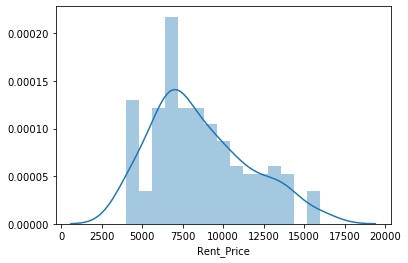

In [25]:
import seaborn as sns
sns.distplot(mh_rent['Rent_Price'],bins=15)

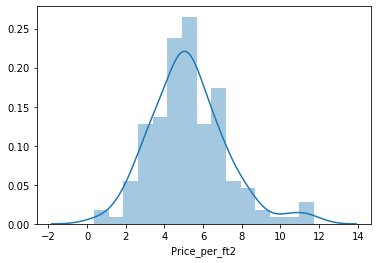

In [26]:
import seaborn as sns
sns.distplot(mh_rent['Price_per_ft2'],bins=15)

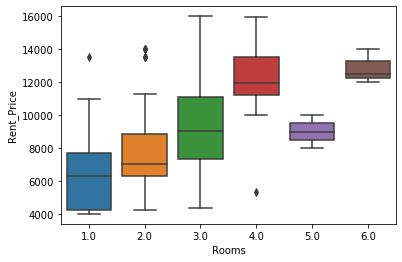

In [27]:
sns.boxplot(x='Rooms', y= 'Rent_Price', data=mh_rent)

Map of Manhattan apartments for rent
The popups will indicate the address and the monthly price for rent thus making it convenient to select the target appartment with the price condition estipulated (max US7000 )

In [28]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7308619
longitude= -73.9871558

map_manhattan_rent = folium.Map(location=[latitude, longitude], zoom_start=12.5)

# add markers to map
for lat, lng, label in zip(mh_rent['Lat'], mh_rent['Long'],'$ ' + mh_rent['Rent_Price'].astype(str)+ ',  '+ mh_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan_rent) 
    

map_manhattan_rent

Map of Manhattan showing the places for rent and the cluster of venues
Now, one can point to a rental place for price and address location information while knowing the cluster venues around it.This is an insightful way to explore rental possibilites

In [29]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7308619
longitude= -73.9871558

# create map with clusters
kclusters=5
map_clusters2 = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters2)

# add markers to map for rental places
for lat, lng, label in zip(mh_rent['Lat'], mh_rent['Long'],'$ ' + mh_rent['Rent_Price'].astype(str)+ mh_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters2)  
    
    # Adds tool to the top right
from folium.plugins import MeasureControl
map_manhattan_rent.add_child(MeasureControl())

# FMeasurement ruler icon to establish distnces on map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_manhattan_rent)

map_clusters2

Now one can explore a particular rental place and its venues in detail
n the map above, examination of appartments with rental place below 7000/month is straightforwad while knowing the venues around it. We could find an appartment with at the right price and in a location with desirable venues. The next step is to see if it is located near a subway metro station, in next cells work.

In [30]:
## kk is the cluster number to explore
kk = 3
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == kk, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Inwood,Mexican Restaurant,Lounge,Pizza Place,Café,Wine Bar,Bakery,American Restaurant,Park,Frozen Yogurt Shop,Spanish Restaurant
5,Manhattanville,Deli / Bodega,Italian Restaurant,Seafood Restaurant,Mexican Restaurant,Sushi Restaurant,Beer Garden,Coffee Shop,Falafel Restaurant,Bike Trail,Other Nightlife
10,Lenox Hill,Sushi Restaurant,Italian Restaurant,Coffee Shop,Gym / Fitness Center,Pizza Place,Burger Joint,Deli / Bodega,Gym,Sporting Goods Shop,Thai Restaurant
12,Upper West Side,Italian Restaurant,Bar,Bakery,Vegetarian / Vegan Restaurant,Indian Restaurant,Coffee Shop,Cosmetics Shop,Wine Bar,Mexican Restaurant,Sushi Restaurant
16,Murray Hill,Sandwich Place,Hotel,Japanese Restaurant,Gym / Fitness Center,Coffee Shop,Salon / Barbershop,Burger Joint,French Restaurant,Bar,Italian Restaurant
17,Chelsea,Coffee Shop,Italian Restaurant,Ice Cream Shop,Bakery,Nightclub,Theater,Art Gallery,Seafood Restaurant,American Restaurant,Hotel
18,Greenwich Village,Italian Restaurant,Sushi Restaurant,French Restaurant,Clothing Store,Chinese Restaurant,Café,Indian Restaurant,Bakery,Seafood Restaurant,Electronics Store
27,Gramercy,Italian Restaurant,Restaurant,Thrift / Vintage Store,Cocktail Bar,Bagel Shop,Coffee Shop,Pizza Place,Mexican Restaurant,Grocery Store,Wine Shop
29,Financial District,Coffee Shop,Hotel,Gym,Wine Shop,Steakhouse,Bar,Italian Restaurant,Pizza Place,Park,Gym / Fitness Center
31,Noho,Italian Restaurant,French Restaurant,Cocktail Bar,Gift Shop,Bookstore,Grocery Store,Mexican Restaurant,Hotel,Sushi Restaurant,Coffee Shop


Mapping Manhattan Subway locations
Manhattan subway metro locations ( address) was obtained from webscrapping sites such as Wikipedia, Google and NY Metro Transit. For simplification, a csv file was produced from the 'numbers' (Apple excel ) so that the reading of this file is the starting point here.
The geodata will be obtain via Nominatim using the algorythm below.

In [31]:
# A csv file summarized the subway station and the addresses for next step to determine geodata
mh=pd.read_csv('NYC_subway_list.csv')
mh.head()

,sub_station,sub_address
0,Dyckman Street Subway Station,"170 Nagle Ave, New York, NY 10034, USA"
1,57 Street Subway Station,"New York, NY 10106, USA"
2,Broad St,"New York, NY 10005, USA"
3,175 Street Station,"807 W 177th St, New York, NY 10033, USA"
4,5 Av and 53 St,"New York, NY 10022, USA"


Add colums labeled 'lat' and 'long' to be filled with geodata

In [32]:
#  Add columns 'lat'  and 'long' to mh dataframe - with random temporary numbers to get started
sLength = len(mh['sub_station'])
lat = pd.Series(np.random.randn(sLength))
long=pd.Series(np.random.randn(sLength))
mh = mh.assign(lat=lat.values)
mh = mh.assign(long=long.values)

In [33]:
mh=pd.read_csv('MH_subway.csv')
print(mh.shape)
mh.head()

(76, 4)


,sub_station,sub_address,lat,long
0,Dyckman Street Subway Station,"170 Nagle Ave, New York, NY 10034, USA",40.861857,-73.924509
1,57 Street Subway Station,"New York, NY 10106, USA",40.764250,-73.954525
2,Broad St,"New York, NY 10005, USA",40.730862,-73.987156
3,175 Street Station,"807 W 177th St, New York, NY 10033, USA",40.847991,-73.939785
4,5 Av and 53 St,"New York, NY 10022, USA",40.764250,-73.954525


In [34]:
# removing duplicate rows and creating new set mhsub1
mhsub1=mh.drop_duplicates(subset=['lat','long'], keep="last").reset_index(drop=True)
mhsub1.shape


(22, 4)

In [35]:
mhsub1.tail()

,sub_station,sub_address,lat,long
17,190 Street Subway Station,"Bennett Ave, New York, NY 10040, USA",40.858113,-73.932983
18,59 St-Lexington Av Station,"E 60th St, New York, NY 10065, USA",40.762259,-73.966271
19,57 Street Station,"New York, NY 10019, United States",40.764250,-73.954525
20,14 Street / 8 Av,"New York, NY 10014, United States",40.730862,-73.987156
21,MTA New York City,"525 11th Ave, New York, NY 10018, USA",40.759809,-73.999282


MAP of Manhattan showing the location of subway stations

In [36]:
# map subway stations 
# create map of Manhattan using latitude and longitude values obtain previoulsy via Moninatim geolocator
latitude=40.7308619
longitude=-73.9871558

map_mhsub1 = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers of subway locations to map
for lat, lng, label in zip(mhsub1['lat'], mhsub1['long'],  mhsub1['sub_station'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(map_mhsub1) 
map_mhsub1

Map of Manhattan showing places for rent and the subway locations nearby.
Now, we can visualize the desirable rental places and their nearest subway station. Popups display rental address and monthly rental price and the subway station name. Notice that the icon in the top-right corner is a "ruler" that allows to measure the distance from a selected rental place to a specific subway station.


In [37]:
mh_rent.head()

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
0,West 105th Street,Upper West Side,2.94,5.0,3400,10000,40.799771,-73.966213
1,East 97th Street,Upper East Side,3.57,3.0,2100,7500,40.788585,-73.955277
2,West 105th Street,Upper West Side,1.89,4.0,2800,5300,40.799771,-73.966213
3,CARMINE ST.,West Village,3.03,2.0,1650,5000,40.730523,-74.001873
4,171 W 23RD ST.,Chelsea,3.45,2.0,1450,5000,40.744118,-73.995299


In [38]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7308619
longitude= -73.9871558

map_manhattan_rent = folium.Map(location=[latitude, longitude], zoom_start=13.3)

# add markers to map
for lat, lng, label in zip(mh_rent['Lat'], mh_rent['Long'],'$ ' + mh_rent['Rent_Price'].astype(str)+ mh_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan_rent) 
    
    # add markers of subway locations to map
for lat, lng, label in zip(mhsub1['lat'], mhsub1['long'],  mhsub1['sub_station'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(map_manhattan_rent) 
    
    # Adds tool to the top right
from folium.plugins import MeasureControl
map_manhattan_rent.add_child(MeasureControl())

# Measurement ruler icon tool to measure distances in map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_manhattan_rent)

map_manhattan_rent

Results
ONE CONSOLIDATE MAP
Map of Manhattan with rental places, subway locations and cluster of venues.
Blue dots are apartments available for rent, red dots are Subway stations and Bubbles are the clusters of venues.

In [39]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7308619
longitude= -73.9871558

map_mh_one = folium.Map(location=[latitude, longitude], zoom_start=13.3)

# add markers to map
for lat, lng, label in zip(mh_rent['Lat'], mh_rent['Long'],'$ ' + mh_rent['Rent_Price'].astype(str)+ ', '+mh_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mh_one) 
    
    # add markers of subway locations to map
for lat, lng, label in zip(mhsub1['lat'], mhsub1['long'],  mhsub1['sub_station'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(map_mh_one) 


# set color scheme for the clusters
kclusters=5
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_mh_one)

    # Adds tool to the top right
from folium.plugins import MeasureControl
map_mh_one.add_child(MeasureControl())

# Measurement ruler icon tool to measure distances in map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_mh_one)

map_mh_one

Problem Resolution - Select the apartment for rent
The above consolidate map was used to explore options.
After examining, I have chosen two locations that meet the requirements which will assess to make a choice.
Apartment 1: 150 East 57th Street	Rental in Midtown East and near 'subway 59th Street' station, Cluster # 2 Monthly rent : 5950 Dollars
Apartment 2: 19 Dutch Street in the Financial District Neighborhood and near 'Fulton Street Subway' station, Cluster # 3 Monthly rent : 6935 Dollars
Venues for Apartment 1 - Cluster 2

In [40]:
## kk is the cluster number to explore
kk = 2
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == kk, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Coffee Shop,Discount Store,Yoga Studio,Steakhouse,Supplement Shop,Tennis Stadium,Shoe Store,Gym,Bank,Seafood Restaurant
1,Chinatown,Chinese Restaurant,Cocktail Bar,Dim Sum Restaurant,American Restaurant,Vietnamese Restaurant,Salon / Barbershop,Noodle House,Bakery,Bubble Tea Shop,Ice Cream Shop
6,Central Harlem,African Restaurant,Seafood Restaurant,French Restaurant,American Restaurant,Cosmetics Shop,Chinese Restaurant,Event Space,Liquor Store,Beer Bar,Gym / Fitness Center
9,Yorkville,Coffee Shop,Gym,Bar,Italian Restaurant,Sushi Restaurant,Pizza Place,Mexican Restaurant,Deli / Bodega,Japanese Restaurant,Pub
14,Clinton,Theater,Italian Restaurant,Coffee Shop,American Restaurant,Gym / Fitness Center,Hotel,Wine Shop,Spa,Gym,Indie Theater
23,Soho,Clothing Store,Boutique,Women's Store,Shoe Store,Men's Store,Furniture / Home Store,Italian Restaurant,Mediterranean Restaurant,Art Gallery,Design Studio
26,Morningside Heights,Coffee Shop,American Restaurant,Park,Bookstore,Pizza Place,Sandwich Place,Burger Joint,Café,Deli / Bodega,Tennis Court
34,Sutton Place,Gym / Fitness Center,Italian Restaurant,Furniture / Home Store,Indian Restaurant,Dessert Shop,American Restaurant,Bakery,Juice Bar,Boutique,Sushi Restaurant
39,Hudson Yards,Coffee Shop,Italian Restaurant,Hotel,Theater,American Restaurant,Café,Gym / Fitness Center,Thai Restaurant,Restaurant,Gym


Venues for Apartment 2 - Cluster 3

In [41]:

## kk is the cluster number to explore
kk = 3
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == kk, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Inwood,Mexican Restaurant,Lounge,Pizza Place,Café,Wine Bar,Bakery,American Restaurant,Park,Frozen Yogurt Shop,Spanish Restaurant
5,Manhattanville,Deli / Bodega,Italian Restaurant,Seafood Restaurant,Mexican Restaurant,Sushi Restaurant,Beer Garden,Coffee Shop,Falafel Restaurant,Bike Trail,Other Nightlife
10,Lenox Hill,Sushi Restaurant,Italian Restaurant,Coffee Shop,Gym / Fitness Center,Pizza Place,Burger Joint,Deli / Bodega,Gym,Sporting Goods Shop,Thai Restaurant
12,Upper West Side,Italian Restaurant,Bar,Bakery,Vegetarian / Vegan Restaurant,Indian Restaurant,Coffee Shop,Cosmetics Shop,Wine Bar,Mexican Restaurant,Sushi Restaurant
16,Murray Hill,Sandwich Place,Hotel,Japanese Restaurant,Gym / Fitness Center,Coffee Shop,Salon / Barbershop,Burger Joint,French Restaurant,Bar,Italian Restaurant
17,Chelsea,Coffee Shop,Italian Restaurant,Ice Cream Shop,Bakery,Nightclub,Theater,Art Gallery,Seafood Restaurant,American Restaurant,Hotel
18,Greenwich Village,Italian Restaurant,Sushi Restaurant,French Restaurant,Clothing Store,Chinese Restaurant,Café,Indian Restaurant,Bakery,Seafood Restaurant,Electronics Store
27,Gramercy,Italian Restaurant,Restaurant,Thrift / Vintage Store,Cocktail Bar,Bagel Shop,Coffee Shop,Pizza Place,Mexican Restaurant,Grocery Store,Wine Shop
29,Financial District,Coffee Shop,Hotel,Gym,Wine Shop,Steakhouse,Bar,Italian Restaurant,Pizza Place,Park,Gym / Fitness Center
31,Noho,Italian Restaurant,French Restaurant,Cocktail Bar,Gift Shop,Bookstore,Grocery Store,Mexican Restaurant,Hotel,Sushi Restaurant,Coffee Shop


Apartment Selection
Using the "one map" above, I was able to explore all possibilities since the popups provide the information needed for a good decision.
Apartment 1 rent cost is US5950 below the US7000 budget. Apt 1 is located 400 meters from subway station at 59th Street . I can use subway for other places around. Venues for this apt are as of Cluster 2 and it is located in a fine district in the East side of Manhattan.
Apartment 2 rent cost is US6935, just under the US7000 budget. Apt 2 is located 60 meters from subway station at Fulton Street, but I will have to ride the subway daily to work , possibly 40-60 min ride. Venues for this apt are as of Cluster 3.
APARTMENT 1 is a better choice for rent as well as convenience it provides.

DISCUSSIONS:
I am greatly impressed with the overall architecture, course design, content and lab works provided during the Coursera IBM Certification Course. This Capstone project enabled me a with a great learning and  opportunity to apply the concepts, packages and tools learned. This project could be a work to showcase my learning.
has given me a good start to delve into data science track and prove to be an effective data scientist.
   


CONCLUSIONS
It is a great experience to learned from expert faculties providing excellent course content which is very helpful for a person to start with data science. This project has helped me to appreciate  practical aspects of the tools and packages. The application is intended to resolve a query using data science concepts that has impacts on  personal and financial dimension of the situation. The mapping with Folium is a very powerful tool to consolidate information and zero in to the solution. 
